# TRAVEL PACKAGE PREDICTION

# IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.combine import SMOTEENN
from xgboost import XGBClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, recall_score, precision_score, f1_score

import warnings
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# IMPORTING DATASET

In [116]:
df = pd.read_csv('tour_package.csv')
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [117]:
df.shape

(4888, 20)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [119]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


**Observations:**

*Age:* Min: 18, Max: 61, Mean: 37

*MonthlyIncome:* Min: 1000, Max: 98678, Mean: 23619

*DurationOfPitch:* Min: 5 mins, Max: 127 mins

*NumberOfTrips:* Min: 1, Max: 22



In [120]:
numeric_cols = df.describe().columns
categ_cols = df.drop(numeric_cols, axis=1).columns
for i in categ_cols:
    print('*'*50)
    print(f'{i}: {df[i].unique()}')

**************************************************
TypeofContact: ['Self Enquiry' 'Company Invited' nan]
**************************************************
Occupation: ['Salaried' 'Free Lancer' 'Small Business' 'Large Business']
**************************************************
Gender: ['Female' 'Male' 'Fe Male']
**************************************************
ProductPitched: ['Deluxe' 'Basic' 'Standard' 'Super Deluxe' 'King']
**************************************************
MaritalStatus: ['Single' 'Divorced' 'Married' 'Unmarried']
**************************************************
Designation: ['Manager' 'Executive' 'Senior Manager' 'AVP' 'VP']


# DATA PRE PROCESSING

In [121]:
df['Gender'] = df['Gender'].replace('Fe Male', 'Female')
df.drop('CustomerID', axis=1, inplace=True)

In [122]:
numeric_cols = df.describe().columns
categ_cols = df.drop(numeric_cols, axis=1).columns
categ_cols

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

In [123]:
df[categ_cols].describe(include='all').T

,count,unique,top,freq
TypeofContact,4863,2,Self Enquiry,3444
Occupation,4888,4,Salaried,2368
Gender,4888,2,Male,2916
ProductPitched,4888,5,Basic,1842
MaritalStatus,4888,4,Married,2340
Designation,4888,5,Executive,1842


## Creating Bins

### Age

In [124]:
df['Age'].describe()

count    4662.000000
mean       37.622265
std         9.316387
min        18.000000
25%        31.000000
50%        36.000000
75%        44.000000
max        61.000000
Name: Age, dtype: float64

In [125]:
df['Age_Bin'] = pd.cut(df['Age'], bins=[18, 25, 30, 40, 50, 70], labels=['18-25', '26-30', '31-40', '41-50', '51-65'])

### Monthly Income

In [126]:
df['MonthlyIncome'].describe()

count     4655.000000
mean     23619.853491
std       5380.698361
min       1000.000000
25%      20346.000000
50%      22347.000000
75%      25571.000000
max      98678.000000
Name: MonthlyIncome, dtype: float64

In [127]:
df['Salary_Bin'] = pd.cut(df['MonthlyIncome'], bins=[0, 15000, 20000, 25000, 30000, 35000, 40000, 50000, 100000], labels=['<15000', '<20000', '<25000', '<30000', '<35000', '<40000', '<50000', '<100000'])

In [128]:
df['Salary_Bin'].value_counts()

<25000     2257
<20000     1038
<30000      768
<35000      382
<40000      206
<15000        2
<100000       2
<50000        0
Name: Salary_Bin, dtype: int64

# UNIVARIATE ANALYSIS (PENDING)

In [129]:
df.columns

Index(['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome', 'Age_Bin',
       'Salary_Bin'],
      dtype='object')

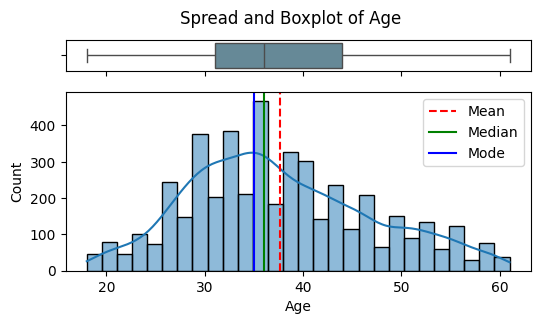

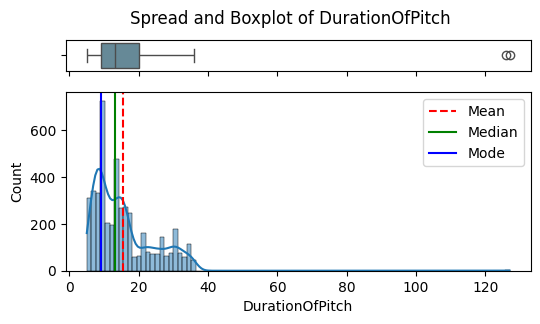

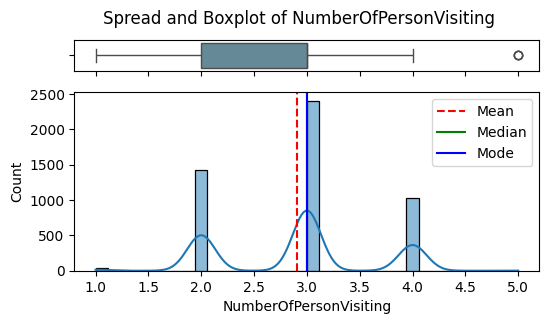

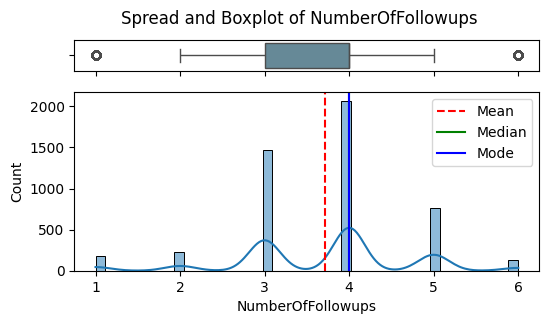

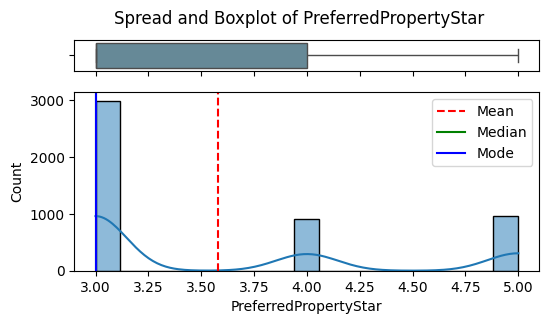

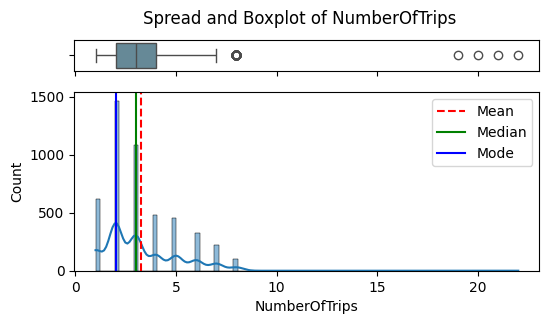

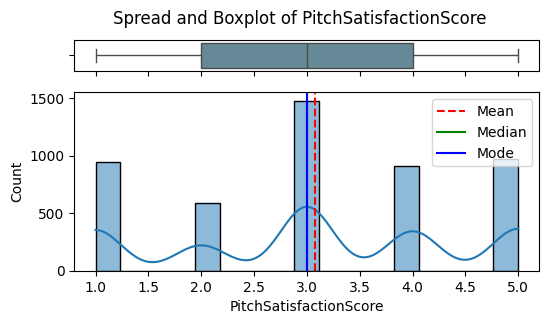

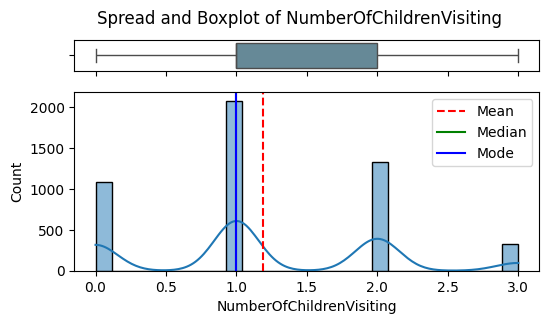

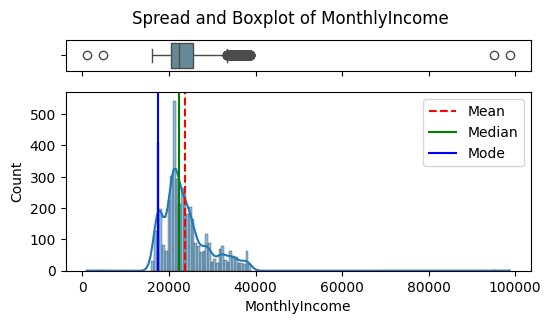

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

cols = ['Age', 'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips',
        'PitchSatisfactionScore', 'NumberOfChildrenVisiting', 'MonthlyIncome']

for col in cols:
    fig, axs = plt.subplots(2, 1, figsize=(6, 3), sharex=True, gridspec_kw={'height_ratios': [0.15, 0.85]})

    # Boxplot
    sns.boxplot(x=df[col], ax=axs[0], color='#5E8D9F')
    axs[0].set(xlabel=None)

    # Histogram
    sns.histplot(df[col], kde=True, ax=axs[1])
    axs[1].axvline(df[col].mean(), color='r', linestyle='--', label='Mean')
    axs[1].axvline(df[col].median(), color='g', linestyle='-', label='Median')
    axs[1].axvline(df[col].mode()[0], color='b', linestyle='-', label='Mode')
    axs[1].legend()

    plt.suptitle(f'Spread and Boxplot of {col}')
    plt.show()

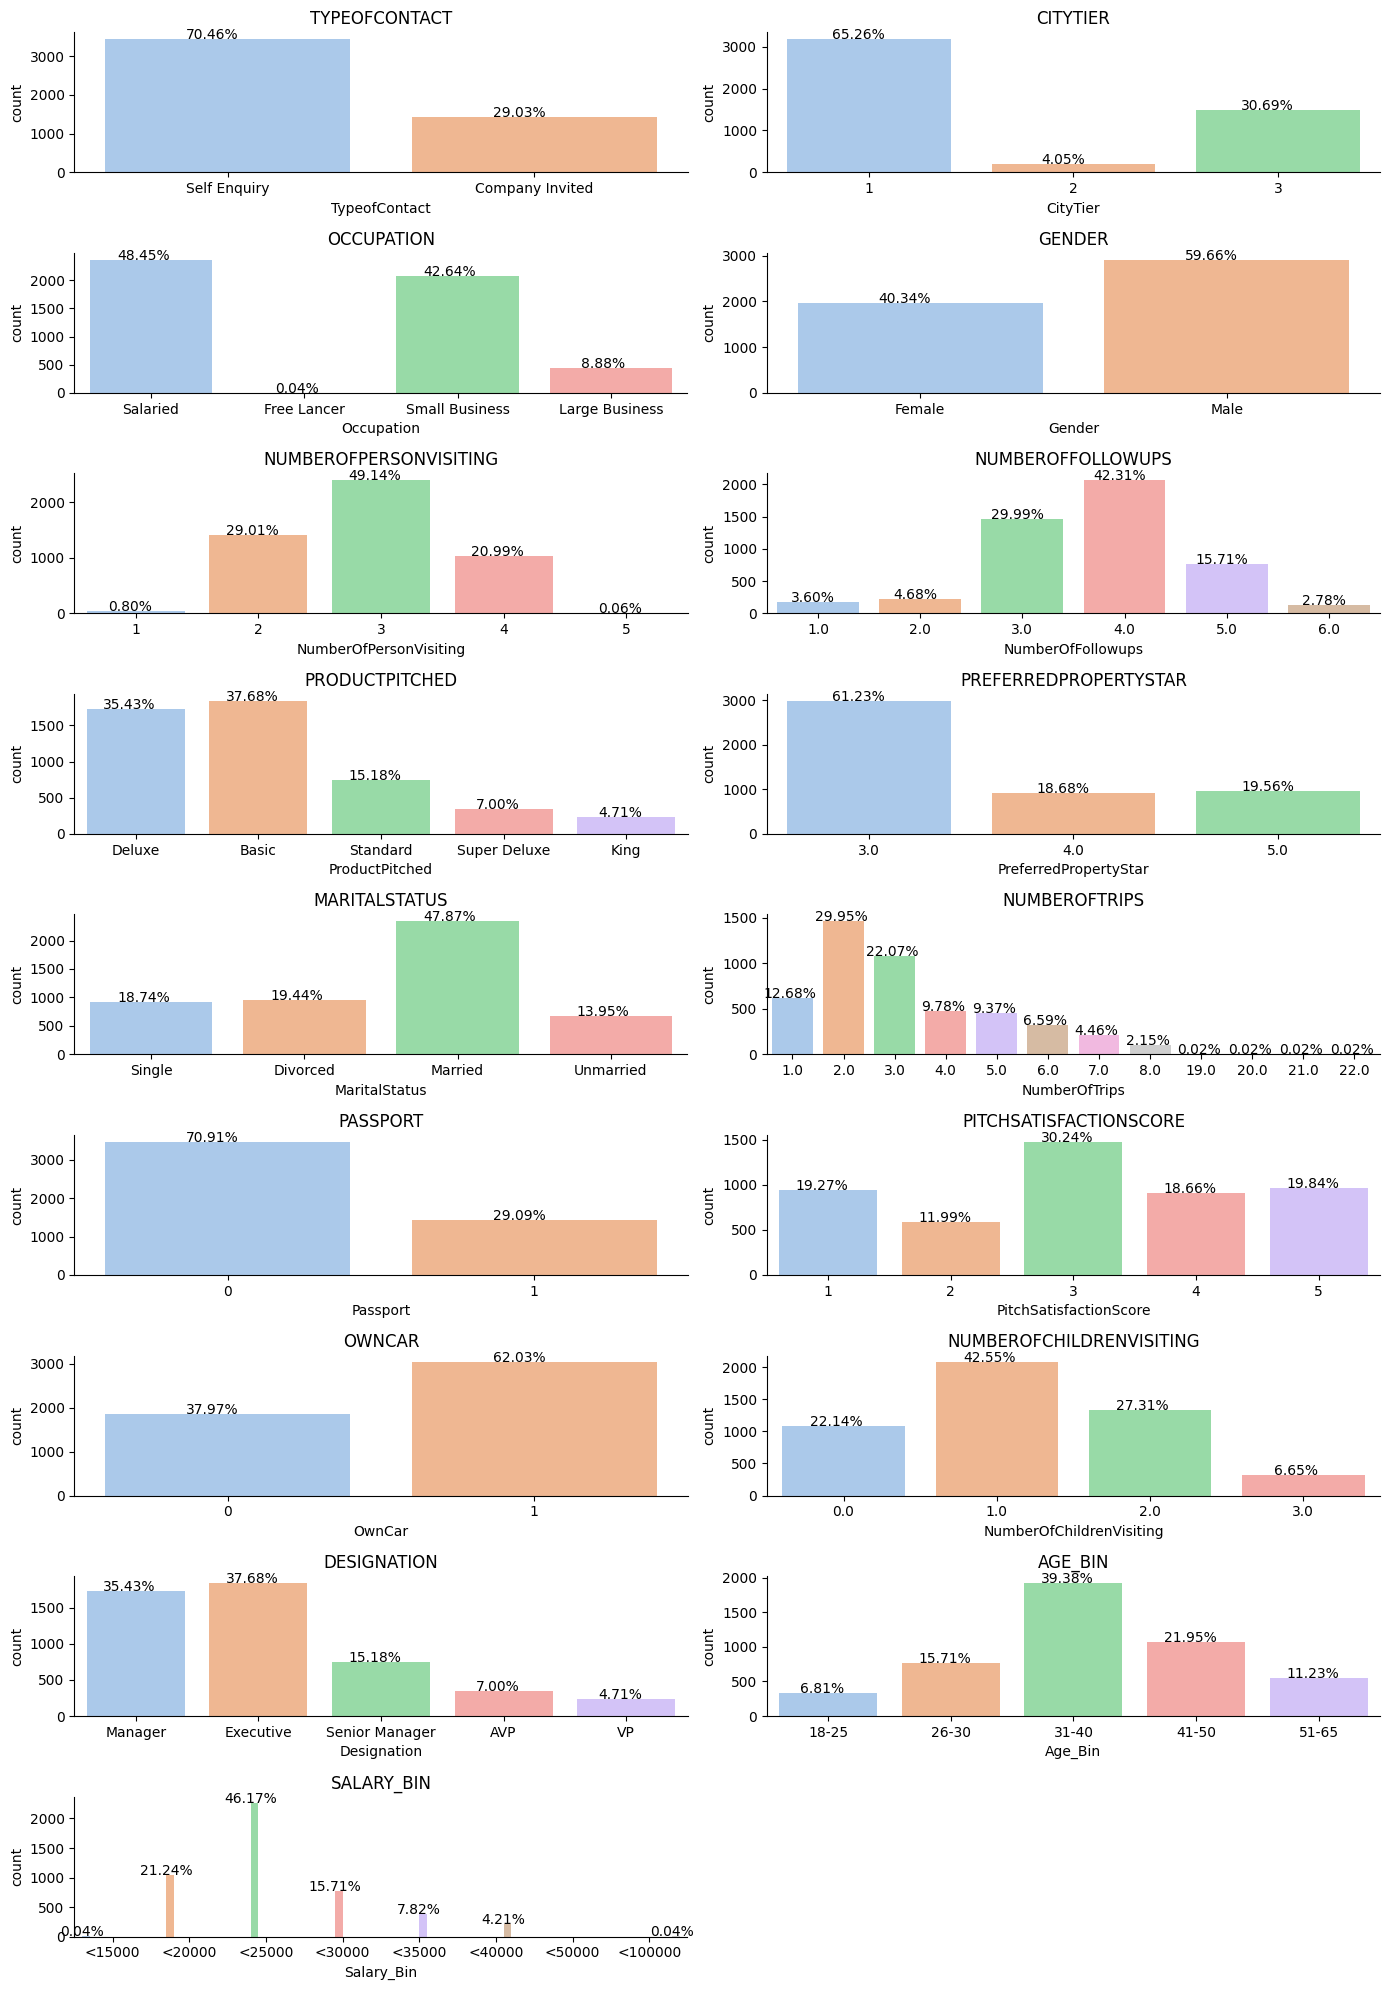

In [131]:
plt.figure(figsize=(14, 20))

cols=['TypeofContact', 'CityTier',
       'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'Age_Bin',
       'Salary_Bin']

colors = sns.color_palette("pastel")

for i, variable in enumerate(cols):
    plt.subplot(9, 2, i + 1)
    ax = sns.countplot(x=df[variable], hue=df[variable], data=df, palette=colors, legend=False)
    sns.despine(top=True, right=True, left=False)
    for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height() / len(df[variable]))
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        plt.annotate(percentage, (x, y), ha='center')
    plt.tight_layout()
    plt.title(cols[i].upper())

plt.show()

# MULTIVARIATE ANALYSIS (PENDING)

In [132]:
df2 = df.copy()
df2.drop(['ProdTaken'], axis=1, inplace=True)

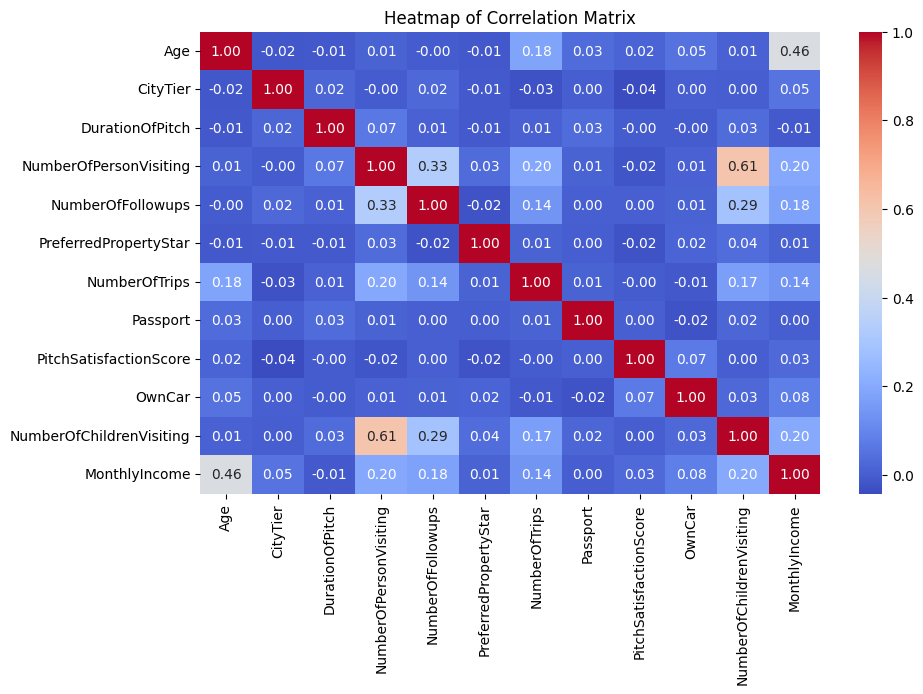

In [133]:
plt.figure(figsize=(10, 6))
sns.heatmap(df2[df2.describe().columns].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

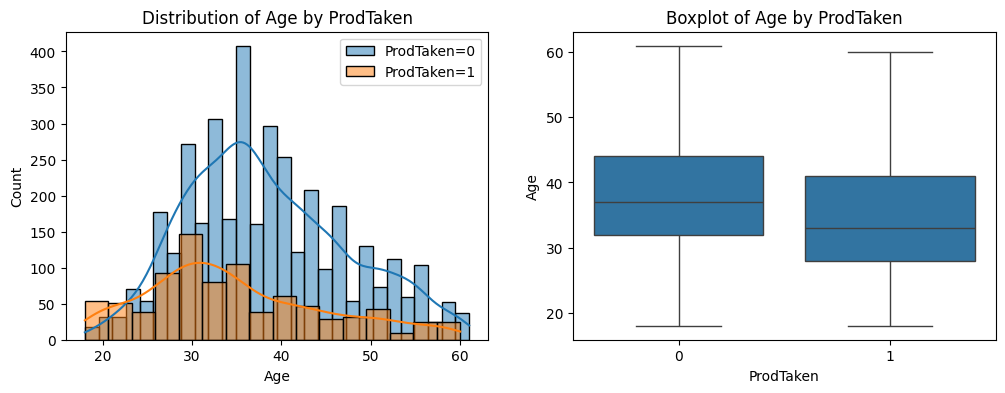

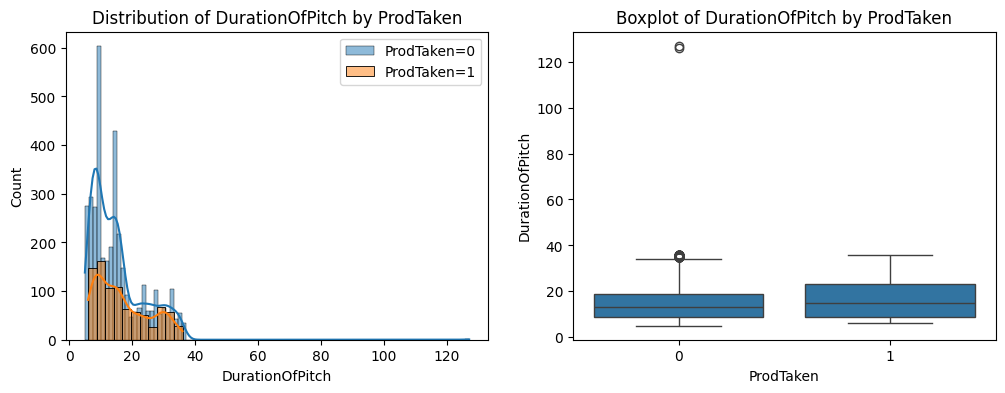

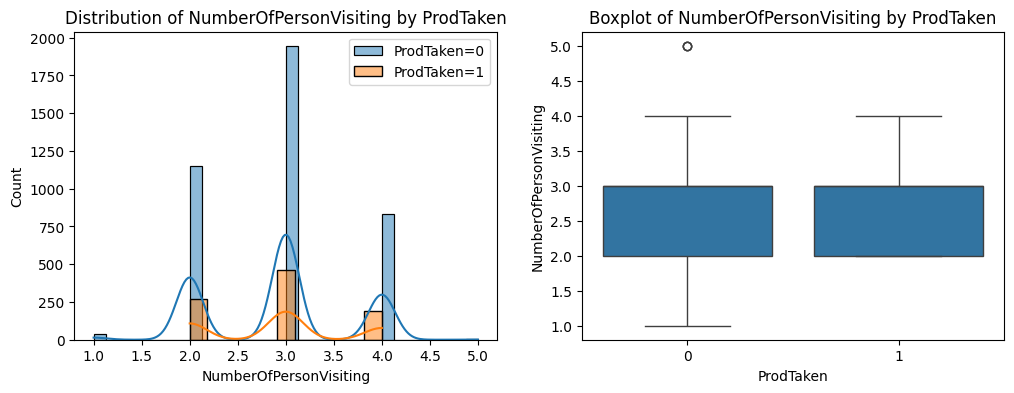

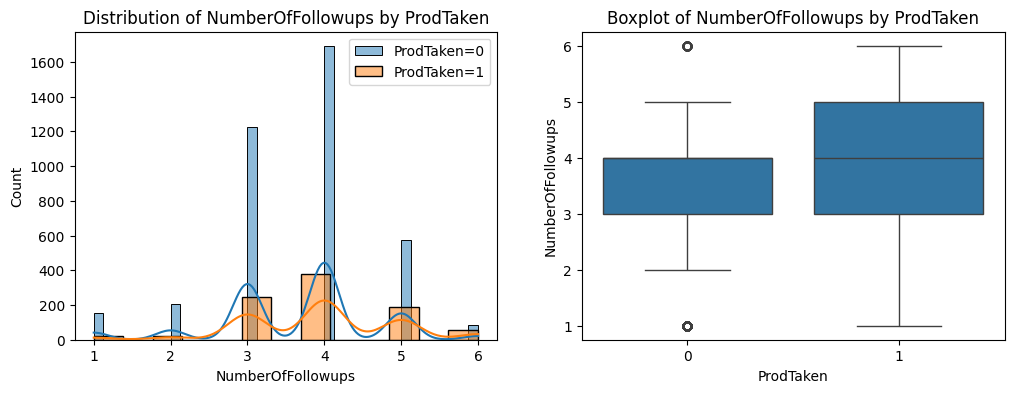

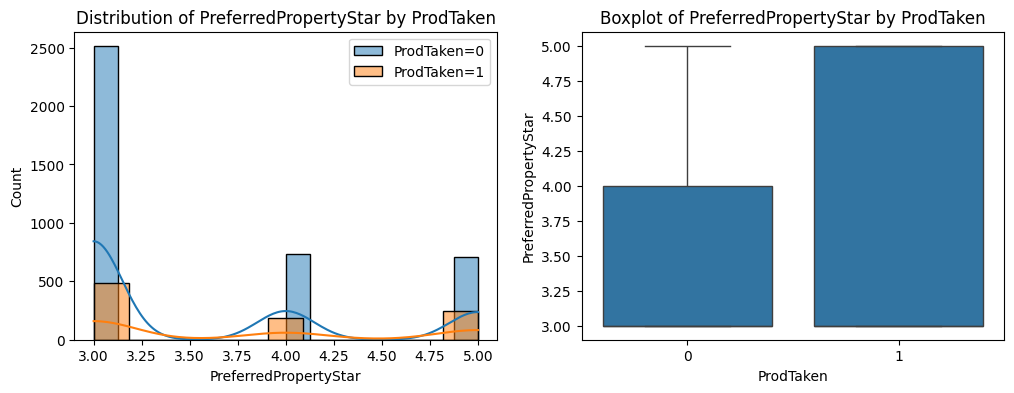

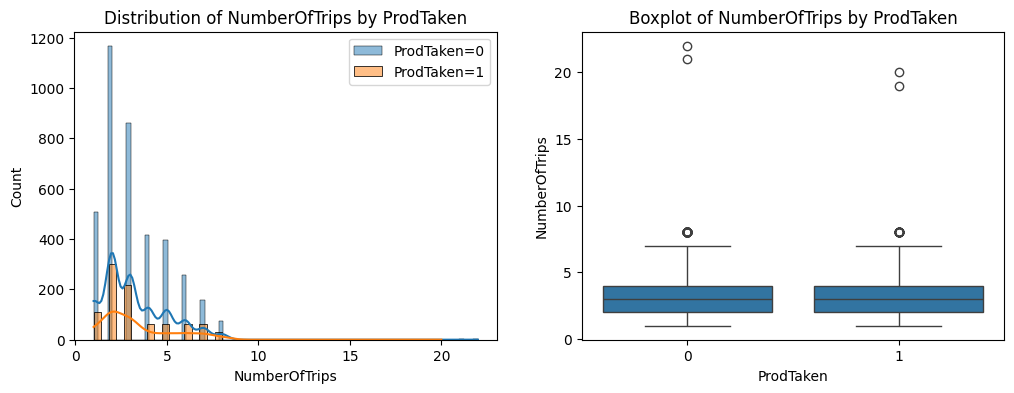

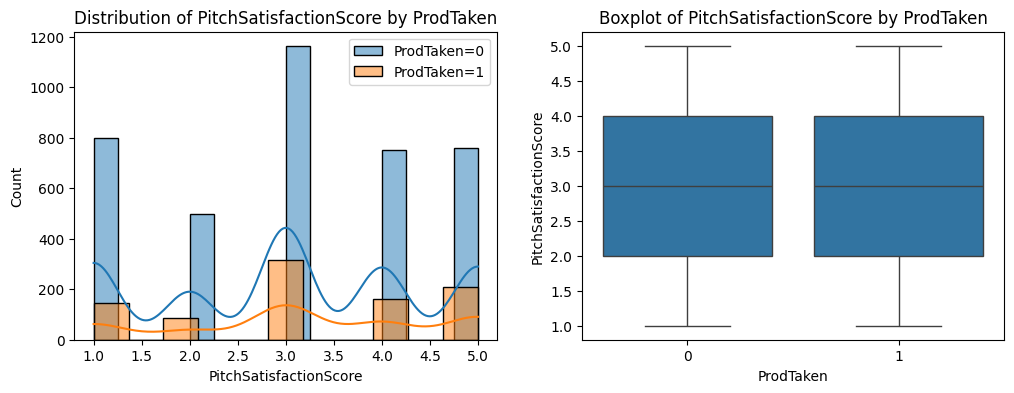

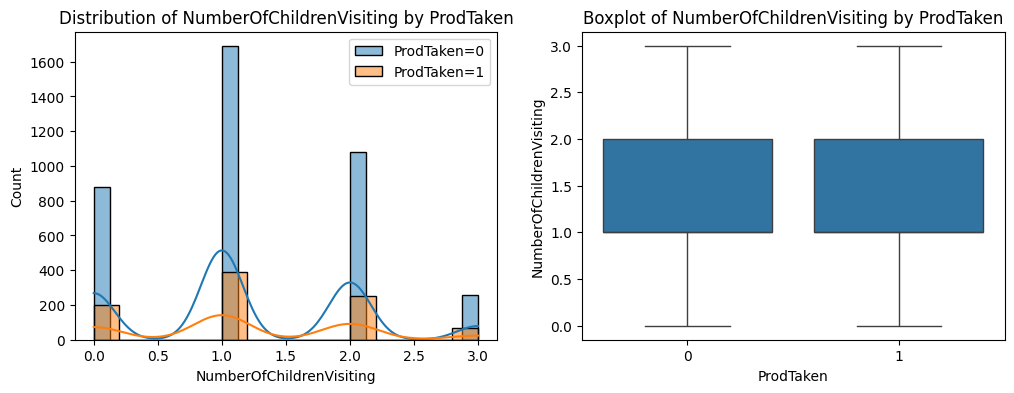

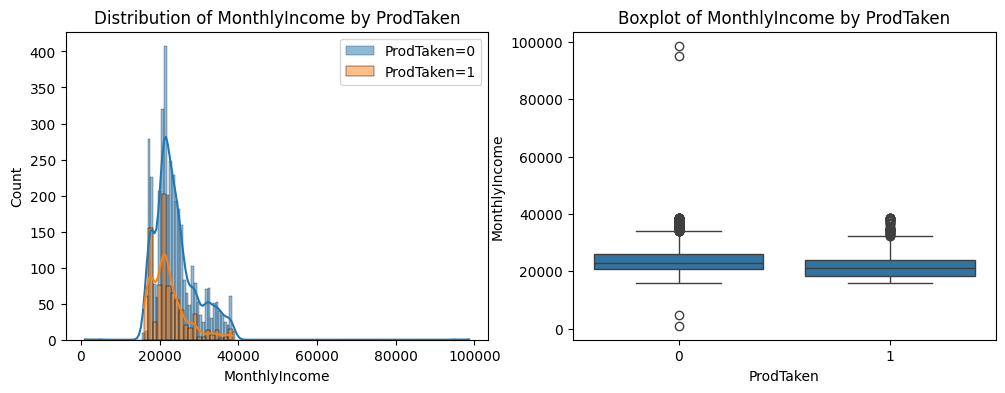

In [134]:
columns = ['Age', 'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups',
           'PreferredPropertyStar', 'NumberOfTrips', 'PitchSatisfactionScore',
           'NumberOfChildrenVisiting', 'MonthlyIncome']

for col in columns:
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    sns.histplot(df[df['ProdTaken'] == 0][col], label='ProdTaken=0', kde=True)
    sns.histplot(df[df['ProdTaken'] == 1][col], label='ProdTaken=1', kde=True)
    plt.legend()
    plt.title(f'Distribution of {col} by ProdTaken')

    plt.subplot(1, 2, 2)
    sns.boxplot(x='ProdTaken', y=col, data=df)
    plt.title(f'Boxplot of {col} by ProdTaken')

    plt.show()

## CUSTOMER PROFILE BY PRODUCT TYPE

In [135]:
# start code here

In [136]:
df.columns

Index(['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome', 'Age_Bin',
       'Salary_Bin'],
      dtype='object')

In [137]:
cust_prof = df[df['ProdTaken'] == 1]

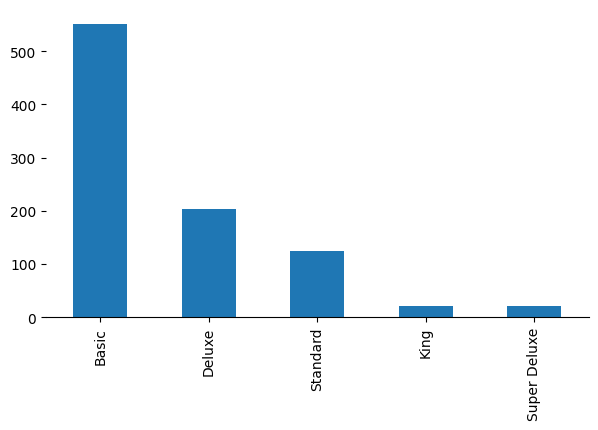

In [138]:
plt.figure(figsize=(7, 4))
ax = plt.gca()
cust_prof['ProductPitched'].value_counts().plot(kind='bar', ax=ax)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()

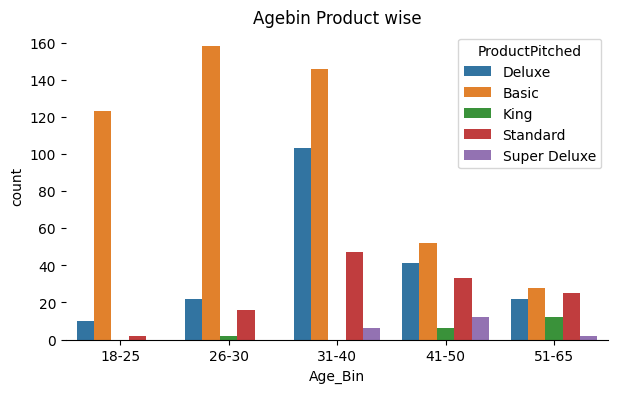

In [139]:
plt.figure(figsize=(7, 4))
ax = sns.countplot(x='Age_Bin', hue='ProductPitched', data=cust_prof)
ax.set_title('Agebin Product wise')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()

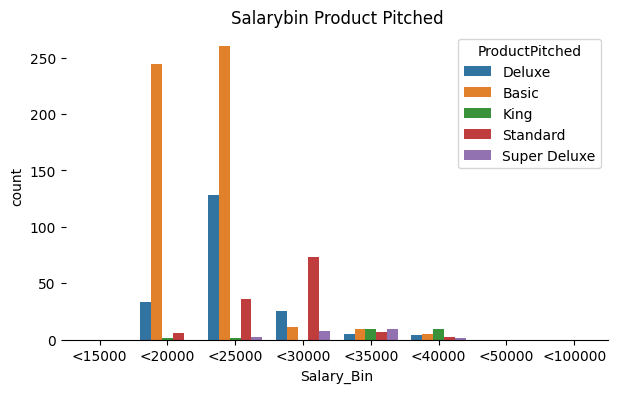

In [140]:
plt.figure(figsize=(7, 4))
ax = sns.countplot(x='Salary_Bin', hue='ProductPitched', data=cust_prof)
ax.set_title('Salarybin Product Pitched')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()

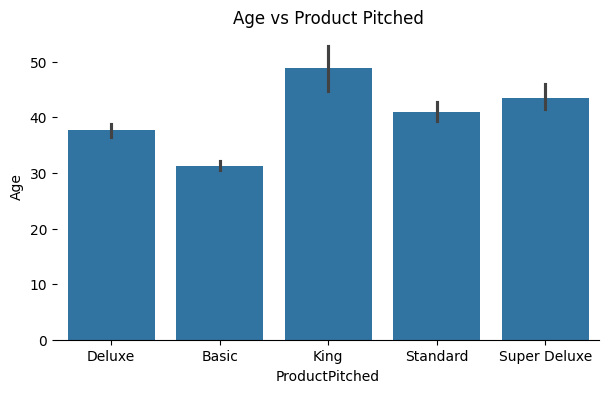

In [141]:
plt.figure(figsize=(7, 4))
ax = sns.barplot(y='Age', x='ProductPitched', data=cust_prof)
ax.set_title('Age vs Product Pitched')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()

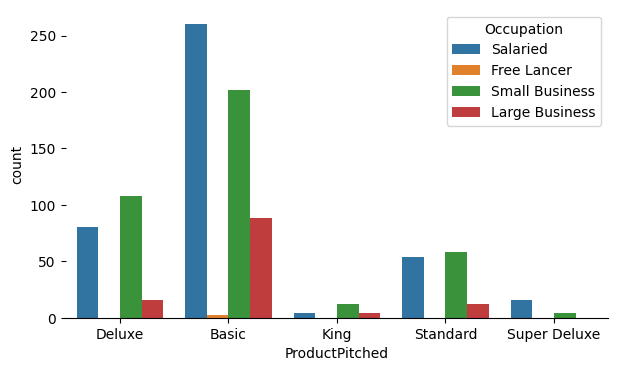

In [142]:
plt.figure(figsize=(7, 4))
ax = sns.countplot(x="ProductPitched", data=cust_prof, hue="Occupation")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()

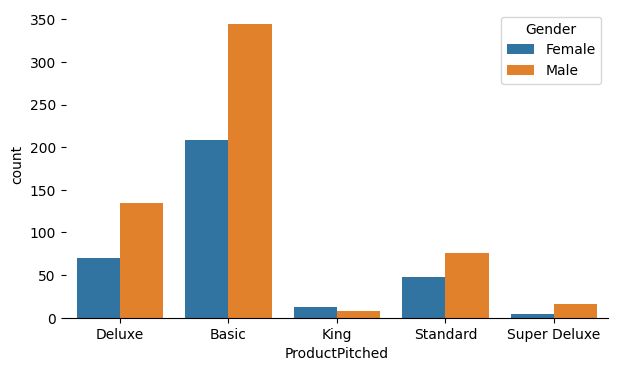

In [143]:
plt.figure(figsize=(7, 4))
ax = sns.countplot(x="ProductPitched", data=cust_prof, hue="Gender")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()

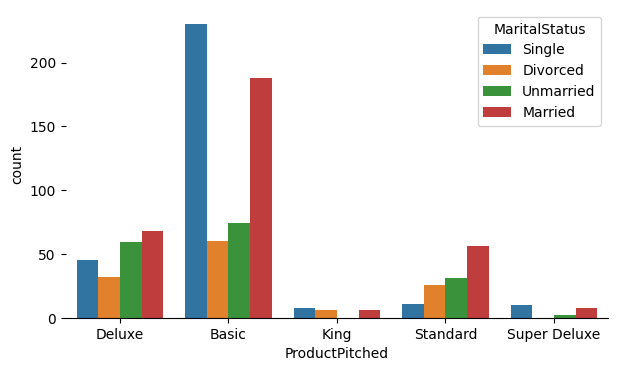

In [144]:
plt.figure(figsize=(7, 4))
ax = sns.countplot(x="ProductPitched", data=cust_prof, hue="MaritalStatus")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()

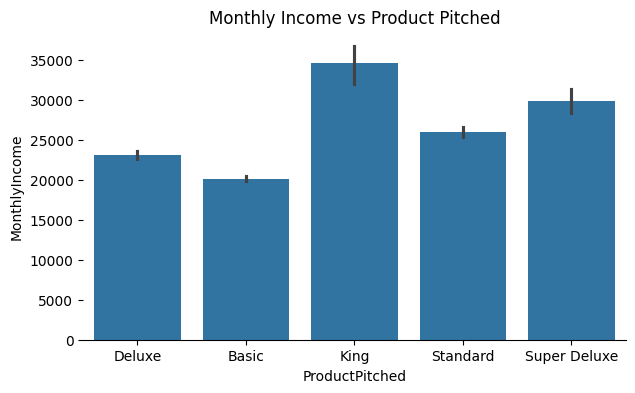

In [145]:
plt.figure(figsize=(7, 4))
ax = sns.barplot(y='MonthlyIncome', x='ProductPitched', data=cust_prof)
ax.set_title('Monthly Income vs Product Pitched')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()

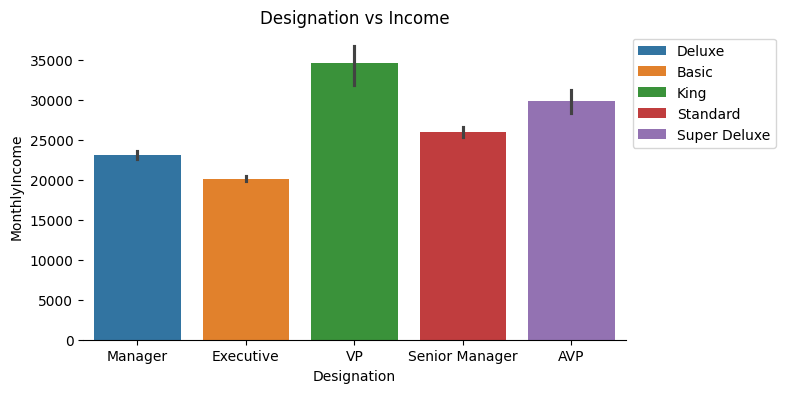

In [146]:
plt.figure(figsize=(7, 4))
ax = sns.barplot(x='Designation', y='MonthlyIncome', data=cust_prof, hue='ProductPitched')
ax.set_title('Designation vs Income')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

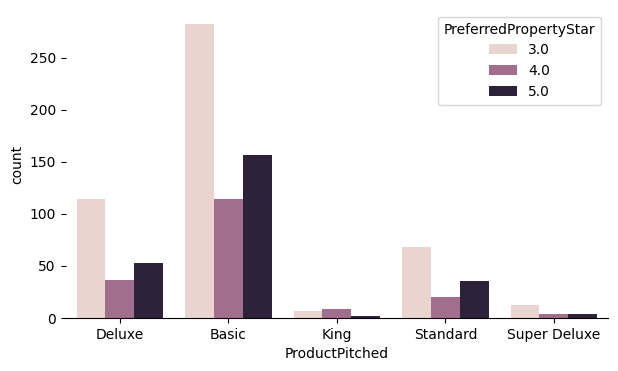

In [147]:
plt.figure(figsize=(7, 4))
ax = sns.countplot(x="ProductPitched", data=cust_prof, hue="PreferredPropertyStar")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()

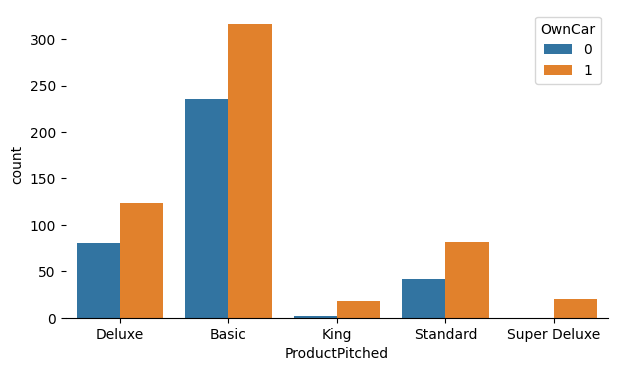

In [148]:
plt.figure(figsize=(7, 4))
ax = sns.countplot(x="ProductPitched", data=cust_prof, hue="OwnCar")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()

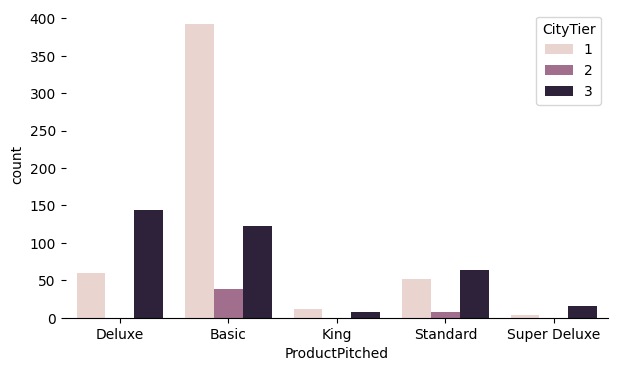

In [149]:
plt.figure(figsize=(7, 4))
ax = sns.countplot(x="ProductPitched", data=cust_prof, hue="CityTier")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()

# OUTLIER DETECTION

In [150]:
def remove_outliers(df):
    numeric_cols = df.select_dtypes(include=[np.number]).drop(columns='ProdTaken')

    Q1 = numeric_cols.quantile(0.25)
    Q3 = numeric_cols.quantile(0.75)
    IQR = Q3 - Q1

    df_out = df[~((df[numeric_cols.columns] < (Q1 - 1.5 * IQR)) | (df[numeric_cols.columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

    return df_out

df_clean = remove_outliers(df)

In [151]:
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,4143.0,0.189959,0.392316,0.0,0.00,0.0,0.00,1.0
Age,3934.0,36.745806,9.041782,18.0,30.00,36.0,42.00,61.0
CityTier,4143.0,1.674391,0.925229,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,3909.0,15.607061,8.239885,5.0,9.00,14.0,21.00,36.0
NumberOfPersonVisiting,4143.0,2.883659,0.724464,1.0,2.00,3.0,3.00,4.0
NumberOfFollowups,4098.0,3.722060,0.790539,2.0,3.00,4.0,4.00,5.0
PreferredPropertyStar,4143.0,3.583152,0.795494,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4143.0,3.096307,1.640754,1.0,2.00,3.0,4.00,7.0
Passport,4143.0,0.291576,0.454543,0.0,0.00,0.0,1.00,1.0
PitchSatisfactionScore,4143.0,3.076997,1.355679,1.0,2.00,3.0,4.00,5.0


In [152]:
non_numeric_cols = df_clean.select_dtypes(exclude=[np.number]).columns
df_clean = df_clean.copy()
df_clean[non_numeric_cols] = df_clean[non_numeric_cols].astype('category')
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4143 entries, 0 to 4887
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4143 non-null   int64   
 1   Age                       3934 non-null   float64 
 2   TypeofContact             4122 non-null   category
 3   CityTier                  4143 non-null   int64   
 4   DurationOfPitch           3909 non-null   float64 
 5   Occupation                4143 non-null   category
 6   Gender                    4143 non-null   category
 7   NumberOfPersonVisiting    4143 non-null   int64   
 8   NumberOfFollowups         4098 non-null   float64 
 9   ProductPitched            4143 non-null   category
 10  PreferredPropertyStar     4143 non-null   float64 
 11  MaritalStatus             4143 non-null   category
 12  NumberOfTrips             4143 non-null   float64 
 13  Passport                  4143 non-null   int64 

In [153]:
df_clean.describe(include='category').T

,count,unique,top,freq
TypeofContact,4122,2,Self Enquiry,2905
Occupation,4143,4,Salaried,1983
Gender,4143,2,Male,2455
ProductPitched,4143,5,Basic,1661
MaritalStatus,4143,4,Married,1946
Designation,4143,5,Executive,1661
Age_Bin,3920,5,31-40,1725
Salary_Bin,3922,4,<25000,2034


# HANDLING MISSING VALUES

In [154]:
df = df_clean.copy()

In [155]:
df = df.drop(['Age_Bin', 'Salary_Bin'], axis=1)

In [156]:
df['DurationOfPitch'] = df['DurationOfPitch'].fillna(0)
df['NumberOfTrips'] = df['NumberOfTrips'].fillna(0)
df['NumberOfChildrenVisiting'] = df['NumberOfChildrenVisiting'].fillna(0)
df['NumberOfFollowups'] = df['NumberOfFollowups'].fillna(0)

In [157]:
df['TypeofContact'].value_counts()

Self Enquiry       2905
Company Invited    1217
Name: TypeofContact, dtype: int64

In [158]:
df['TypeofContact'] = df['TypeofContact'].fillna('Self Enquiry')

In [159]:
df['PreferredPropertyStar'].value_counts()

3.0    2534
5.0     807
4.0     802
Name: PreferredPropertyStar, dtype: int64

In [160]:
df['PreferredPropertyStar'] = df['PreferredPropertyStar'].fillna(df['PreferredPropertyStar'].mode()[0])

In [161]:
df.dropna(subset=['Age', 'MonthlyIncome'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [162]:
df.isnull().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [163]:
len(df.columns)

19

# DATA PRE PROCESSING

In [164]:
X = df.drop(['ProdTaken'], axis=1)
y = df['ProdTaken']

### Converting categorical variables to numeric

In [165]:
X = pd.get_dummies(X)
X.head()

,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,...,ProductPitched_Super Deluxe,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_AVP,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,41.0,3,6.0,3,3.0,3.0,1.0,1,2,1,...,0,0,0,1,0,0,0,1,0,0
1,49.0,1,14.0,3,4.0,4.0,2.0,0,3,1,...,0,1,0,0,0,0,0,1,0,0
2,37.0,1,8.0,3,4.0,3.0,7.0,1,3,0,...,0,0,0,1,0,0,1,0,0,0
3,33.0,1,9.0,2,3.0,3.0,2.0,1,5,1,...,0,1,0,0,0,0,1,0,0,0
4,32.0,1,8.0,3,3.0,3.0,1.0,0,5,1,...,0,0,0,1,0,0,1,0,0,0


### Balancing dataset

In [166]:
resample = SMOTEENN(random_state=42)
X_resampled, y_resampled = resample.fit_resample(X, y)

X, y = X_resampled, y_resampled

# APPLYING MODELS

## BEFORE HYPERPARAMETER TUNING

In [167]:
models = {
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', tree_method='gpu_hist'),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

results = []

for model_name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=5)
    results.append({
        'model': model_name,
        'average_cv_score': cv_scores.mean()
    })

results_df = pd.DataFrame(results)
results_df

## AFTER HYPERPARAMETER TUNING

In [168]:
# model_params = {
#     'XGBoost': {
#         'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss', tree_method='gpu_hist'),
#         'params': {
#             'n_estimators': [50, 100, 200],
#             'learning_rate': [0.01, 0.1, 1.0],
#             'max_depth': [3, 5, 10],
#             'min_child_weight': [1, 5, 10],
#             'gamma': [0.5, 1, 1.5, 2],
#             'subsample': [0.6, 0.8, 1.0],
#             'colsample_bytree': [0.6, 0.8, 1.0]
#         }
#     },
#     'Decision Tree': {
#         'model': DecisionTreeClassifier(),
#         'params': {
#             'max_depth': [None, 5, 10, 15, 20],
#             'min_samples_split': [2, 5, 10, 20],
#             'min_samples_leaf': [1, 2, 5, 10]
#         }
#     },
#     'Random Forest': {
#         'model': RandomForestClassifier(),
#         'params': {
#             'n_estimators': [10, 50, 100, 200],
#             'max_depth': [None, 5, 10, 15, 20],
#             'min_samples_split': [2, 5, 10, 20],
#             'min_samples_leaf': [1, 2, 5, 10]
#         }
#     },
#     'Bagging': {
#         'model': BaggingClassifier(),
#         'params': {
#             'n_estimators': [10, 50, 100, 200],
#             'max_samples': [0.5, 1.0],
#             'max_features': [0.5, 1.0]
#         }
#     },
#     'AdaBoost': {
#         'model': AdaBoostClassifier(),
#         'params': {
#             'n_estimators': [50, 100, 200],
#             'learning_rate': [0.01, 0.1, 1.0]
#         }
#     },
#     'Gradient Boosting': {
#         'model': GradientBoostingClassifier(),
#         'params': {
#             'n_estimators': [50, 100, 200],
#             'learning_rate': [0.01, 0.1, 1.0],
#             'max_depth': [3, 5, 10],
#             'min_samples_split': [2, 5, 10],
#             'min_samples_leaf': [1, 2, 5]
#         }
#     }
# }

In [ ]:
model_params = {
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': [None, 5, 10, 15, 20],
            'min_samples_split': [2, 5, 10, 20],
            'min_samples_leaf': [1, 2, 5, 10]
        }
    }
}

In [169]:
scores = []

scoring = {'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'f1_score': make_scorer(f1_score)}

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False, scoring=scoring, refit='f1_score')
    clf.fit(X, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
        'precision': clf.cv_results_['mean_test_precision'],
        'recall': clf.cv_results_['mean_test_recall'],
        'f1_score': clf.cv_results_['mean_test_f1_score']
    })

scores_df = pd.DataFrame(scores)
scores_df

,model,best_score,best_params,precision,recall,f1_score
0,XGBoost,0.924918,"{'colsample_bytree': 0.8, 'gamma': 0.5, 'learn...","[0.6440952771961614, 0.6482162024931611, 0.648...","[0.9608229768485806, 0.9644939523670976, 0.962...","[0.770857973796248, 0.7750765556621915, 0.7750..."
1,Decision Tree,0.883074,"{'max_depth': 15, 'min_samples_leaf': 1, 'min_...","[0.8642896077396547, 0.860098310161956, 0.8588...","[0.8906222203749117, 0.8808304584562949, 0.864...","[0.8761177074082094, 0.8689434595429999, 0.859..."
2,Random Forest,0.936621,"{'max_depth': 20, 'min_samples_leaf': 1, 'min_...","[0.9454814450024841, 0.9607554513057872, 0.955...","[0.895110353713787, 0.9155102040816328, 0.9175...","[0.9122037963632537, 0.931092338874452, 0.9303..."
3,Bagging,0.952362,"{'max_features': 0.5, 'max_samples': 1.0, 'n_e...","[0.9397797143292603, 0.9573643751706626, 0.956...","[0.9134718816243401, 0.915920029926431, 0.9228...","[0.9206270386394012, 0.9300779919459515, 0.933..."
4,AdaBoost,0.852085,"{'learning_rate': 1.0, 'n_estimators': 200}","[0.653808645001239, 0.6533096608829999, 0.6706...","[0.8661839644207989, 0.8792285631156739, 0.874...","[0.744373522352339, 0.7489097770727021, 0.7577..."
5,Gradient Boosting,0.944840,"{'learning_rate': 1.0, 'max_depth': 10, 'min_s...","[0.6847178286799815, 0.7306117904845341, 0.785...","[0.9240924394197598, 0.8861440625129889, 0.877...","[0.7851252873320681, 0.7990691149282568, 0.825..."


In [170]:
results_df.rename(columns={'average_cv_score': 'before_tuning_accuracy'}, inplace=True)
scores_df.rename(columns={'best_score': 'after_tuning_accuracy'}, inplace=True)

final_df = pd.merge(results_df, scores_df, on='model')
cols = [col for col in final_df.columns if col != 'best_params']
final_df = final_df[cols + ['best_params']]

final_df

,model,before_tuning_accuracy,after_tuning_accuracy,precision,recall,f1_score,best_params
0,XGBoost,0.921439,0.924918,"[0.6440952771961614, 0.6482162024931611, 0.648...","[0.9608229768485806, 0.9644939523670976, 0.962...","[0.770857973796248, 0.7750765556621915, 0.7750...","{'colsample_bytree': 0.8, 'gamma': 0.5, 'learn..."
1,Decision Tree,0.856595,0.883074,"[0.8642896077396547, 0.860098310161956, 0.8588...","[0.8906222203749117, 0.8808304584562949, 0.864...","[0.8761177074082094, 0.8689434595429999, 0.859...","{'max_depth': 15, 'min_samples_leaf': 1, 'min_..."
2,Random Forest,0.927940,0.936621,"[0.9454814450024841, 0.9607554513057872, 0.955...","[0.895110353713787, 0.9155102040816328, 0.9175...","[0.9122037963632537, 0.931092338874452, 0.9303...","{'max_depth': 20, 'min_samples_leaf': 1, 'min_..."
3,Bagging,0.890100,0.952362,"[0.9397797143292603, 0.9573643751706626, 0.956...","[0.9134718816243401, 0.915920029926431, 0.9228...","[0.9206270386394012, 0.9300779919459515, 0.933...","{'max_features': 0.5, 'max_samples': 1.0, 'n_e..."
4,AdaBoost,0.832484,0.852085,"[0.653808645001239, 0.6533096608829999, 0.6706...","[0.8661839644207989, 0.8792285631156739, 0.874...","[0.744373522352339, 0.7489097770727021, 0.7577...","{'learning_rate': 1.0, 'n_estimators': 200}"
5,Gradient Boosting,0.865031,0.944840,"[0.6847178286799815, 0.7306117904845341, 0.785...","[0.9240924394197598, 0.8861440625129889, 0.877...","[0.7851252873320681, 0.7990691149282568, 0.825...","{'learning_rate': 1.0, 'max_depth': 10, 'min_s..."
